<a href="https://colab.research.google.com/github/umidyor/PySpark_uzb_simple_tutorial/blob/main/PySpark_viewing_data%26Selecting_and_Accessing_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install pyspark  #avvalgidek yana kutubxonani yuklab olamiz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 3.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.1-py2.py3-none-any.whl size=311285398 sha256=0b14297c297edf9e9242dcab64019aa1e3706dbc80a59d0f4040bf0db7e34520
  Stored in directory: /root/.cache/pip/wheels/0d/77/a3/ff2f74cc9ab41f8f594dabf0579c2a7c6de920d584206e0834
Successfully built pyspark


In [60]:
from pyspark.sql import SparkSession   #SparkSession orqali biz sparkda ishlashga imkoniyat yaratamiz>>>SparkSession.builder.getOrCreate()  ushbu metodlar data bilan,yoki sql baza bilan o'zaro aloqa o'rnatishni va ular o'rtasida so'rov olib borishga yordam beradi.
import pandas as pd
from datetime import datetime,date
spark = SparkSession.builder.getOrCreate()
pandas_df = pd.DataFrame({
    'a': [1, 2, 3],
    'b': [2., 3., 4.],
    'c': ['string1', 'string2', 'string3'],
    'd': [date(2000, 1, 1), date(2000, 2, 1), date(2000, 3, 1)],
    'e': [datetime(2000, 1, 1, 12, 0), datetime(2000, 1, 2, 12, 0), datetime(2000, 1, 3, 12, 0)]
})
df = spark.createDataFrame(pandas_df)
df

a,b,c,d,e
1,2.0,string1,2000-01-01,2000-01-01 12:00:00
2,3.0,string2,2000-02-01,2000-01-02 12:00:00
3,4.0,string3,2000-03-01,2000-01-03 12:00:00


In [61]:
spark.conf.set('spark.sql.repl.eagerEval.enabled', True)       #Shu bilan bir qatorda, siz spark.sql.repl.eagerEval.enabledJupyter kabi noutbuklarda PySpark DataFrame-ni konfiguratsiyasini yoqishingiz mumkin.
df
#Shunday chiroyli holatda chiqarish

a,b,c,d,e
1,2.0,string1,2000-01-01,2000-01-01 12:00:00
2,3.0,string2,2000-02-01,2000-01-02 12:00:00
3,4.0,string3,2000-03-01,2000-01-03 12:00:00


In [62]:
df.show(1,vertical=True)    #Qatorlarni vertikal tarzda ko'rsatish uchun shunchaki vertical=True parametri

-RECORD 0------------------
 a   | 1                   
 b   | 2.0                 
 c   | string1             
 d   | 2000-01-01          
 e   | 2000-01-01 12:00:00 
only showing top 1 row



In [63]:
df.show(1)   #Horizontal

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+
only showing top 1 row



In [64]:
df.columns   #DataFrame ustunlari ro'yxati.Xuddi pandasdagi kabi

['a', 'b', 'c', 'd', 'e']

In [65]:
df.select('a', 'b', 'c', 'd', 'e').describe().show()   #describe() funskiyasi xuddi pandasdagi funksiya kabi ustunlarni tasvirlamoqda.
#count - joriy ustun(column)larga tegishli jami elementlarni sanaydi
#mean - joriy ustun(column)larga tegishli jami elementlarni o'rtachasini hisoblaydi
#stddev - ...o'rtacha qiymatlar orasidagi yaqinlikni hisoblaydi
#min - minimalni
#max - maximalni

+-------+---+---+-------+
|summary|  a|  b|      c|
+-------+---+---+-------+
|  count|  3|  3|      3|
|   mean|2.0|3.0|   null|
| stddev|1.0|1.0|   null|
|    min|  1|2.0|string1|
|    max|  3|4.0|string3|
+-------+---+---+-------+



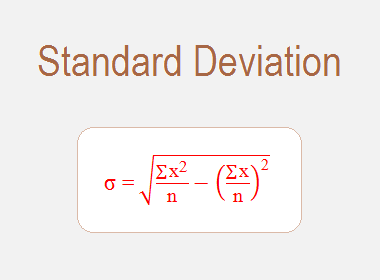

In [66]:
df.collect()  #Datarame-ni Row() funksiyasiga tayyor holatda o'tkazib beradi!

[Row(a=1, b=2.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),
 Row(a=3, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))]

In [67]:
import datetime
#Tepadagi tayyor natijadan foydalanamiz
from pyspark.sql import Row
s=spark.createDataFrame(
    [
    Row(a=1, b=7.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),

    Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0)),

    Row(a=3, b=4.0, c='string3', d=datetime.date(2000, 3, 1), e=datetime.datetime(2000, 1, 3, 12, 0))
    ]

)

In [68]:
s.describe()

summary,a,b,c
count,3,3,3
mean,2.0,4.666666666666667,null
stddev,1.0,2.081665999466133,null
min,1,3.0,string1
max,3,7.0,string3


In [69]:
s.take(2) #boshidagi 2 qatorni chiqaramiz

[Row(a=1, b=7.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0))]

In [70]:
s.toPandas()  #Spark holatdagi DataFrameni Pandas holatiga o'tkazib beradi.

/usr/local/lib/python3.10/dist-packages/pyspark/sql/pandas/conversion.py:251: FutureWarning: Passing unit-less datetime64 dtype to .astype is deprecated and will raise in a future version. Pass 'datetime64[ns]' instead
  series = series.astype(t, copy=False)


,a,b,c,d,e
0,1,7.0,string1,2000-01-01,2000-01-01 12:00:00
1,2,3.0,string2,2000-02-01,2000-01-02 12:00:00
2,3,4.0,string3,2000-03-01,2000-01-03 12:00:00


In [71]:
s.head(2)

[Row(a=1, b=7.0, c='string1', d=datetime.date(2000, 1, 1), e=datetime.datetime(2000, 1, 1, 12, 0)),
 Row(a=2, b=3.0, c='string2', d=datetime.date(2000, 2, 1), e=datetime.datetime(2000, 1, 2, 12, 0))]

# Selecting and Accessing Data

In [72]:
df.a

Column<'a'>

In [73]:
from pyspark.sql import Column
from pyspark.sql.functions import upper,lower

type(df.c) == type(upper(df.c)) == type(df.c.isNull())

True

In [74]:
upper(df.c)

Column<'upper(c)'>

In [75]:
df.select(df.c).show()

+-------+
|      c|
+-------+
|string1|
|string2|
|string3|
+-------+



In [76]:
df.withColumn('upper_c', upper(df.c)).show() #Ushbu kodda biz yangi 'upper_c' ustunini qo'shdik va unga 'c' ustunidan nusha olib joyladik.Hamda uni sparkning maxsus upper() funksiyasi orqali
#uni hajmini katta qildik!

+---+---+-------+----------+-------------------+-------+
|  a|  b|      c|         d|                  e|upper_c|
+---+---+-------+----------+-------------------+-------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|STRING1|
|  2|3.0|string2|2000-02-01|2000-01-02 12:00:00|STRING2|
|  3|4.0|string3|2000-03-01|2000-01-03 12:00:00|STRING3|
+---+---+-------+----------+-------------------+-------+



In [77]:
# 'a' ustunidan qiymati 1 ga teng valuega tegishli boshqa ma'lumotlarni ham chiqarib beradi.
df.filter(df.a == 1).show()

+---+---+-------+----------+-------------------+
|  a|  b|      c|         d|                  e|
+---+---+-------+----------+-------------------+
|  1|2.0|string1|2000-01-01|2000-01-01 12:00:00|
+---+---+-------+----------+-------------------+

